<a href="https://colab.research.google.com/github/rollways/HW/blob/main/W3HomeWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [360]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [361]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2021-12-10 15:41:01--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.111.139, 108.177.111.101, 108.177.111.100, ...
Connecting to drive.google.com (drive.google.com)|108.177.111.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8me3lu9gvnb4a4q20vkkeg7spukp18d3/1639150800000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-12-10 15:41:02--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8me3lu9gvnb4a4q20vkkeg7spukp18d3/1639150800000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.202.132, 2607:f8b0:4001:c06::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|74

In [362]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [363]:
data = pd.read_csv('/content/drive/MyDrive/T大使/data3_project.csv')

In [364]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04


In [365]:
pd.set_option('display.float_format',lambda x:'%.2f'% x)

In [366]:
data.drop(data[data['CustomerID'].isnull()].index,inplace=True)

In [367]:
data['Revenue'] = data['Quantity'] * abs(data['UnitPrice'])

In [368]:
data.Revenue.describe()

count     1403724.00
mean        82668.84
std        922440.49
min     -41471304.00
25%          4672.00
50%          8752.00
75%         25904.00
max     702441768.00
Name: Revenue, dtype: float64

### 1.請畫出每個區域的收入分佈圖(條狀圖)

In [369]:
tx_sales_country = data.groupby(['Country'])['Revenue'].sum().reset_index()
tx_sales_country

,Country,Revenue
0,中區,26938859448.00
1,佐登微爾,1159339584.00
2,南區,11729044592.00
3,台北A區,19440607160.00
4,台北B區,14527691488.00
5,彰雲區,12313428224.00
6,竹區,10939031712.00
7,總管理處,2575628528.00
8,高屏全區,16420603160.00


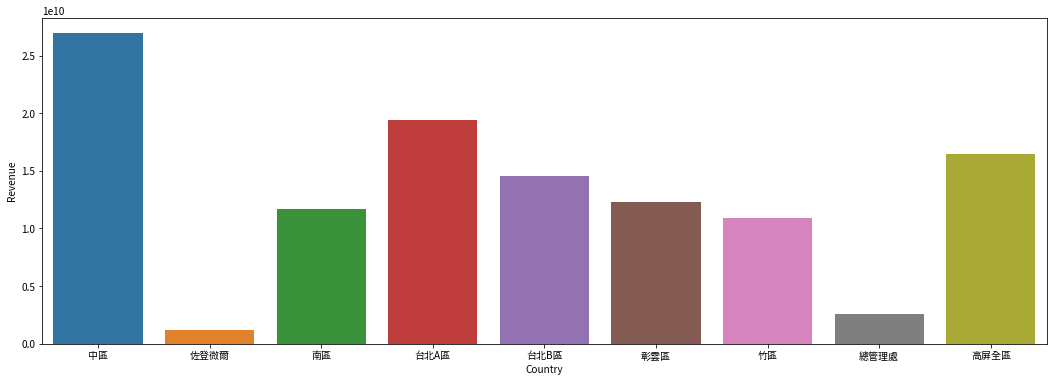

In [370]:
figure,axes = plt.subplots(figsize=(18,6))
sns.barplot(x='Country',y='Revenue',data=tx_sales_country,ax=axes)
plt.show()

### 2. 這些銷售資料裡，請找出銷售最好的產品（或課程），並用圓餅圖的方式與折線圖的方式呈現在每個地區的收入分佈狀況

In [371]:
sale_max = data.groupby(['Description'])['Revenue'].sum().reset_index()
sale_max = sale_max.sort_values(by=['Revenue'],ascending=False)
sale_max

,Description,Revenue
146,全身健康優化SPA課程單堂,12202477640.00
143,全背順氣活力SPA課程單堂,10968565720.00
191,太極磁氧靚顏課程單堂,4808559688.00
7,(新)溫熱刮痧課程單堂,4564733824.00
34,3C明眸舒壓課程單堂,4519755936.00
...,...,...
8,(異業)足部玫瑰舒壓按摩單堂,472.00
510,熊本熊ALFI玻璃壺,472.00
652,義式手感瓷杯,472.00
446,檸檬果汁杯(寬口),472.00


In [372]:
bestseller = data[data['Description'] == '全身健康優化SPA課程單堂']
bestseller

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
80435,PS5329001874,HB95A01,全身健康優化SPA課程單堂,8.00,2019-02-28,985.00,9100001700007.00,中區,2014-03-04,2014-03-04,7880.00
80438,PS5329001875,HB95A01,全身健康優化SPA課程單堂,8.00,2019-02-28,985.00,9100000366754.00,中區,2002-11-11,2012-08-09,7880.00
80487,PS5330018753,HB95A01,全身健康優化SPA課程單堂,8.00,2019-02-28,985.00,9100000066425.00,中區,2001-08-01,2012-08-07,7880.00
82483,PS5553016468,HB95A01,全身健康優化SPA課程單堂,8.00,2019-03-01,985.00,9100001439358.00,高屏全區,2012-10-31,2012-10-31,7880.00
82485,PS5553016469,HB95A01,全身健康優化SPA課程單堂,8.00,2019-03-01,985.00,9100000247824.00,高屏全區,2005-01-24,2012-11-06,7880.00
...,...,...,...,...,...,...,...,...,...,...,...
1403583,PS5117030690,HB95A01,全身健康優化SPA課程單堂,16.00,2020-12-31,3659.00,9100002566596.00,台北B區,2018-11-08,2018-11-08,58544.00
1403943,PS5444012976,HB95A01,全身健康優化SPA課程單堂,16.00,2020-12-31,3659.00,9100002020029.00,南區,2015-12-19,2015-12-19,58544.00
1404016,PS5441025945,HB95A01,全身健康優化SPA課程單堂,16.00,2020-12-31,3659.00,9100001309859.00,南區,2006-07-21,2012-12-19,58544.00
1404117,PS5360027480,HB95A01,全身健康優化SPA課程單堂,88.00,2020-12-31,18859.00,9100000095883.00,彰雲區,2005-03-10,2012-10-06,1659592.00


In [373]:
tx_sell_country = bestseller.groupby(['Country'])['Revenue'].sum().reset_index()
tx_sell_country

,Country,Revenue
0,中區,2294907384.00
1,南區,1503622328.00
2,台北A區,2919231200.00
3,台北B區,1475806696.00
4,彰雲區,1261692264.00
5,竹區,1081002656.00
6,總管理處,944.00
7,高屏全區,1666214168.00


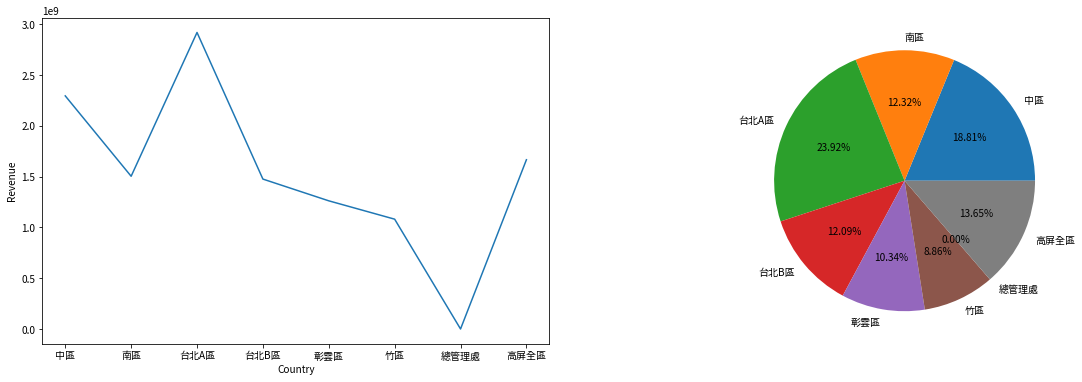

In [374]:
fig,axes = plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='Country',y='Revenue',data=tx_sell_country,ax=axes[0])
plt.pie(tx_sell_country['Revenue'], labels=tx_sell_country['Country'], autopct='%1.2f%%')
plt.show()

### 3.請用折線圖展示春、夏、秋、東每個季節購買的人數與收入

In [375]:
data1 = data

In [376]:
data1['InvoiceDate'] = pd.to_datetime(data1['InvoiceDate'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1403724 entries, 0 to 1404434
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   InvoiceNo          1403724 non-null  object        
 1   StockCode          1403724 non-null  object        
 2   Description        1403724 non-null  object        
 3   Quantity           1403724 non-null  float64       
 4   InvoiceDate        1403724 non-null  datetime64[ns]
 5   UnitPrice          1403724 non-null  float64       
 6   CustomerID         1403724 non-null  float64       
 7   Country            1403724 non-null  object        
 8   member_start_date  1366651 non-null  object        
 9   first_trans_date   1400412 non-null  object        
 10  Revenue            1403724 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 128.5+ MB


In [377]:
data1['Month'] = data1['InvoiceDate'].map(lambda date:date.month)
data1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,Month
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,1
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,1
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,1
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00,1
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1404430,PS5324024941,KQ02,玫瑰晶萃活膚液130ml,16.00,2020-12-31,2946.00,9100000595826.00,中區,2010-03-15,2012-07-11,47136.00,12
1404431,PS5219002027,GAXFG1,真正除臭抗菌噴霧(銀離子迷迭香)250ml,8.00,2020-12-31,309.00,9100003028369.00,竹區,2020-12-08,2020-11-26,2472.00,12
1404432,PS5219002027,MAB2G1,BA-5肌密全效噴霧奇蹟水70ml,8.00,2020-12-31,1094.00,9100003028369.00,竹區,2020-12-08,2020-11-26,8752.00,12
1404433,PS5219002027,WD096,緊緻保濕裸膚羽翼面膜25ml-零售單包,16.00,2020-12-31,165.00,9100003028369.00,竹區,2020-12-08,2020-11-26,2640.00,12


In [378]:
data1.loc[data1['Month'].isin([3,4,5]) , 'Season'] = '春'
data1.loc[data1['Month'].isin([6,7,8]) , 'Season'] = '夏'
data1.loc[data1['Month'].isin([9,10,11]) , 'Season'] = '秋'
data1.loc[data1['Month'].isin([1,2,12]) , 'Season'] = '冬'
data1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,Month,Season
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,1,冬
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,1,冬
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,1,冬
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00,1,冬
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,1,冬
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404430,PS5324024941,KQ02,玫瑰晶萃活膚液130ml,16.00,2020-12-31,2946.00,9100000595826.00,中區,2010-03-15,2012-07-11,47136.00,12,冬
1404431,PS5219002027,GAXFG1,真正除臭抗菌噴霧(銀離子迷迭香)250ml,8.00,2020-12-31,309.00,9100003028369.00,竹區,2020-12-08,2020-11-26,2472.00,12,冬
1404432,PS5219002027,MAB2G1,BA-5肌密全效噴霧奇蹟水70ml,8.00,2020-12-31,1094.00,9100003028369.00,竹區,2020-12-08,2020-11-26,8752.00,12,冬
1404433,PS5219002027,WD096,緊緻保濕裸膚羽翼面膜25ml-零售單包,16.00,2020-12-31,165.00,9100003028369.00,竹區,2020-12-08,2020-11-26,2640.00,12,冬


In [379]:
season_data = data1.groupby(['Season'])['Revenue'].sum().reset_index()
season_data

,Season,Revenue
0,冬,28828967672.00
1,夏,28654689096.00
2,春,28946035592.00
3,秋,29614541536.00


In [380]:
season_data1 = data1.groupby(['Season'])['InvoiceNo'].nunique().reset_index()
season_data1

,Season,InvoiceNo
0,冬,134643
1,夏,159847
2,春,167689
3,秋,153933


In [381]:
season_data2 = data1.groupby(['Season']).agg({'Revenue':'sum','InvoiceNo':'nunique'})
season_data2

,Revenue,InvoiceNo
Season,,
冬,28828967672.00,134643
夏,28654689096.00,159847
春,28946035592.00,167689
秋,29614541536.00,153933


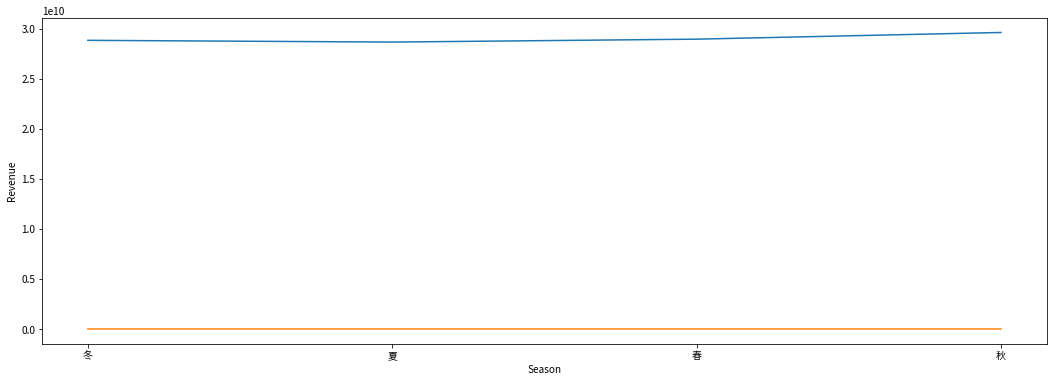

In [382]:
figure,axes = plt.subplots(figsize=(18,6))
sns.lineplot(x='Season',y='Revenue',data=season_data2)
sns.lineplot(x='Season',y='InvoiceNo',data=season_data2)
plt.show()

In [383]:
season_data2['Revenue'] = season_data2['Revenue']/100000
season_data2

,Revenue,InvoiceNo
Season,,
冬,288289.68,134643
夏,286546.89,159847
春,289460.36,167689
秋,296145.42,153933


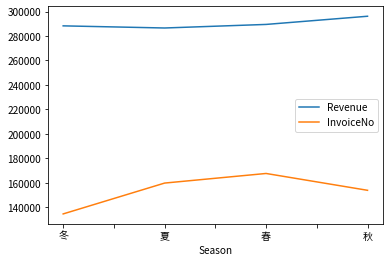

In [384]:
season_data2.plot()